# Moving Average Envelopes

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:moving_average_envelopes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AXISBANK.NS'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,754.900024,759.950012,747.200012,748.700012,747.562073,4917748
2020-01-02 00:00:00+05:30,750.000000,759.000000,747.599976,756.950012,755.799561,5156046
2020-01-03 00:00:00+05:30,753.150024,756.250000,740.500000,742.950012,741.820862,8489729
2020-01-06 00:00:00+05:30,739.450012,739.599976,721.700012,723.250000,722.150757,6356198
2020-01-07 00:00:00+05:30,728.000000,738.000000,721.049988,725.750000,724.646973,9103360


In [3]:
import talib as ta

In [4]:
df['20SMA'] = ta.SMA(df['Adj Close'], timeperiod=20)

In [5]:
df['Upper_Envelope'] = df['20SMA'] + (df['20SMA'] * 0.025)
df['Lower_Envelope'] = df['20SMA'] - (df['20SMA'] * 0.025)

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,20SMA,Upper_Envelope,Lower_Envelope
Date,,,,,,,,,
2020-01-01 00:00:00+05:30,754.900024,759.950012,747.200012,748.700012,747.562073,4917748,NaN,NaN,NaN
2020-01-02 00:00:00+05:30,750.000000,759.000000,747.599976,756.950012,755.799561,5156046,NaN,NaN,NaN
2020-01-03 00:00:00+05:30,753.150024,756.250000,740.500000,742.950012,741.820862,8489729,NaN,NaN,NaN
2020-01-06 00:00:00+05:30,739.450012,739.599976,721.700012,723.250000,722.150757,6356198,NaN,NaN,NaN
2020-01-07 00:00:00+05:30,728.000000,738.000000,721.049988,725.750000,724.646973,9103360,NaN,NaN,NaN


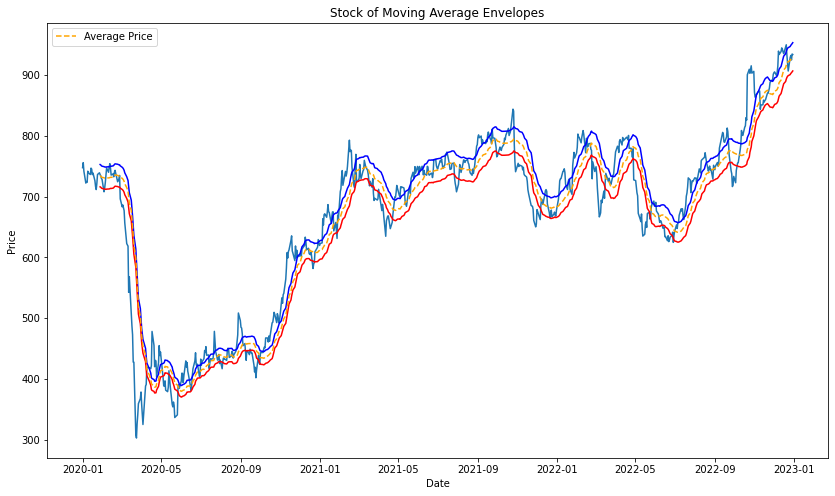

In [7]:
# Line Chart
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(df['Upper_Envelope'], color='blue')
plt.plot(df['Lower_Envelope'], color='red')
plt.plot(df['Adj Close'].rolling(20).mean(), color='orange', label='Average Price', linestyle='--')
plt.title('Stock of Moving Average Envelopes')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()

## Candlestick with MAE

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,20SMA,Upper_Envelope,Lower_Envelope,VolumePositive
0,18261.770833,754.900024,759.950012,747.200012,748.700012,747.562073,4917748,NaN,NaN,NaN,False
1,18262.770833,750.000000,759.000000,747.599976,756.950012,755.799561,5156046,NaN,NaN,NaN,True
2,18263.770833,753.150024,756.250000,740.500000,742.950012,741.820862,8489729,NaN,NaN,NaN,False
3,18266.770833,739.450012,739.599976,721.700012,723.250000,722.150757,6356198,NaN,NaN,NaN,False
4,18267.770833,728.000000,738.000000,721.049988,725.750000,724.646973,9103360,NaN,NaN,NaN,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

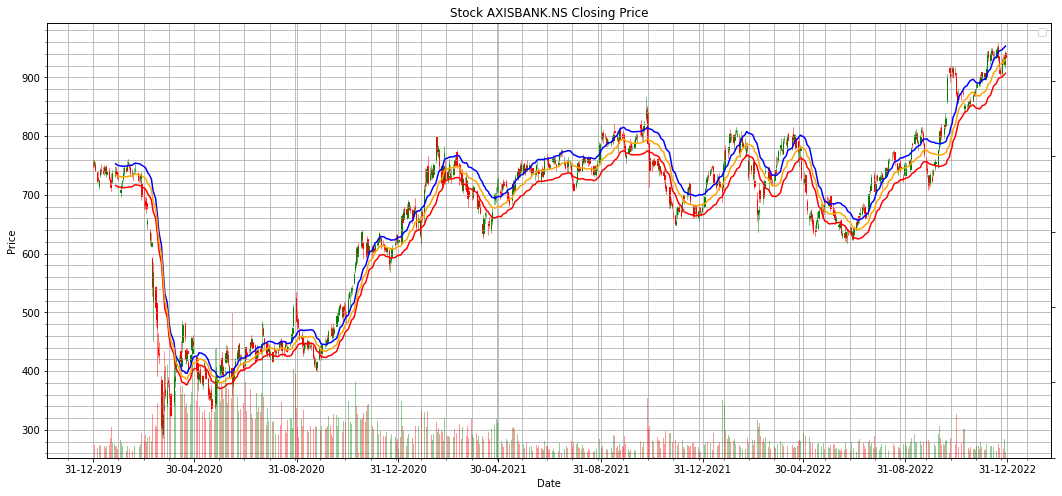

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Upper_Envelope'], color='blue')
ax1.plot(df['Lower_Envelope'], color='red')
ax1.plot(df['Adj Close'].rolling(20).mean(), color='orange')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')